# Online Shoppers Purchasing Intention - Exploratory Data Analysis

Pada <i>Exploratory Data Analysis project</i> ini akan dilakukan analisis mengenai <i>Online Shoppers Purchasing Intention dataset</i> yang diperoleh dari <a href="https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset">UCI</a>. Data penelitian ini terdiri dari atribut 10 numerik dan 8 kategori. Fitur/kolom atribut <i>Revenue</i> digunakan sebagai <i>class label</i>. Berikut penjelasan dari sumber terkait:

<ul>
    <li style="text-align:justify">"Administrative", "Administrative_duration", "Informational", "Informational Duration", "Product Related", "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.</li>
    <li style="text-align:justify">The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all page views to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.</li>
    <li style="text-align:justify">The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.</li>
    <li style="text-align:justify">The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.</li>

## Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Acquisition, Setup, and Cleansing

In [2]:
df = pd.read_csv('online_shoppers_intention-2.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.shape

(12330, 18)

In [4]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [5]:
pd.set_option('precision',3)
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000,12330.000,12330.000,12330.000,12330.000,12330.000,12330.000,12330.000,12330.000,12330.000,12330.000,12330.000,12330.000,12330.000
mean,2.315,80.819,0.504,34.472,31.731,1194.746,0.022,0.043,5.889,0.061,2.124,2.357,3.147,4.070
std,3.322,176.779,1.270,140.749,44.476,1913.669,0.048,0.049,18.568,0.199,0.911,1.717,2.402,4.025
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000
25%,0.000,0.000,0.000,0.000,7.000,184.137,0.000,0.014,0.000,0.000,2.000,2.000,1.000,2.000
50%,1.000,7.500,0.000,0.000,18.000,598.937,0.003,0.025,0.000,0.000,2.000,2.000,3.000,2.000
75%,4.000,93.256,0.000,0.000,38.000,1464.157,0.017,0.050,0.000,0.000,3.000,2.000,4.000,4.000
max,27.000,3398.750,24.000,2549.375,705.000,63973.522,0.200,0.200,361.764,1.000,8.000,13.000,9.000,20.000


In [6]:
df.skew()

Administrative             1.960
Administrative_Duration    5.616
Informational              4.036
Informational_Duration     7.579
ProductRelated             4.342
ProductRelated_Duration    7.263
BounceRates                2.948
ExitRates                  2.149
PageValues                 6.383
SpecialDay                 3.303
OperatingSystems           2.066
Browser                    3.242
Region                     0.984
TrafficType                1.963
Weekend                    1.266
Revenue                    1.910
dtype: float64

In [7]:
for i in df.columns:
    a=df[df[i]=='?'].shape[0]
    if a>0:
        print(i,'\t: ', a)
    else:
        print(i, '\t: no missing value')

Administrative 	: no missing value
Administrative_Duration 	: no missing value
Informational 	: no missing value
Informational_Duration 	: no missing value
ProductRelated 	: no missing value
ProductRelated_Duration 	: no missing value
BounceRates 	: no missing value
ExitRates 	: no missing value
PageValues 	: no missing value
SpecialDay 	: no missing value
Month 	: no missing value
OperatingSystems 	: no missing value
Browser 	: no missing value
Region 	: no missing value
TrafficType 	: no missing value
VisitorType 	: no missing value
Weekend 	: no missing value
Revenue 	: no missing value


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [8]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [10]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [11]:
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [12]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [13]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000,0.602,0.377,0.256,0.431,0.374,-0.224,-0.316,0.099,-0.095,-6.347e-03,-0.025,-5.487e-03,-0.034,2.642e-02,0.139
Administrative_Duration,0.602,1.000,0.303,0.238,0.289,0.355,-0.144,-0.206,0.068,-0.073,-7.343e-03,-0.015,-5.561e-03,-0.014,1.499e-02,0.094
Informational,0.377,0.303,1.000,0.619,0.374,0.388,-0.116,-0.164,0.049,-0.048,-9.527e-03,-0.038,-2.917e-02,-0.034,3.578e-02,0.095
Informational_Duration,0.256,0.238,0.619,1.000,0.280,0.347,-0.074,-0.105,0.031,-0.031,-9.579e-03,-0.019,-2.714e-02,-0.025,2.408e-02,0.070
ProductRelated,0.431,0.289,0.374,0.280,1.000,0.861,-0.205,-0.293,0.056,-0.024,4.290e-03,-0.013,-3.812e-02,-0.043,1.609e-02,0.159
ProductRelated_Duration,0.374,0.355,0.388,0.347,0.861,1.000,-0.185,-0.252,0.053,-0.036,2.976e-03,-0.007,-3.309e-02,-0.036,7.311e-03,0.152
BounceRates,-0.224,-0.144,-0.116,-0.074,-0.205,-0.185,1.000,0.913,-0.119,0.073,2.382e-02,-0.016,-6.485e-03,0.078,-4.651e-02,-0.151
ExitRates,-0.316,-0.206,-0.164,-0.105,-0.293,-0.252,0.913,1.000,-0.174,0.102,1.457e-02,-0.004,-8.907e-03,0.079,-6.259e-02,-0.207
PageValues,0.099,0.068,0.049,0.031,0.056,0.053,-0.119,-0.174,1.000,-0.064,1.851e-02,0.046,1.132e-02,0.013,1.200e-02,0.493
SpecialDay,-0.095,-0.073,-0.048,-0.031,-0.024,-0.036,0.073,0.102,-0.064,1.000,1.265e-02,0.003,-1.610e-02,0.052,-1.677e-02,-0.082


## Data Visualization

In [14]:
df.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


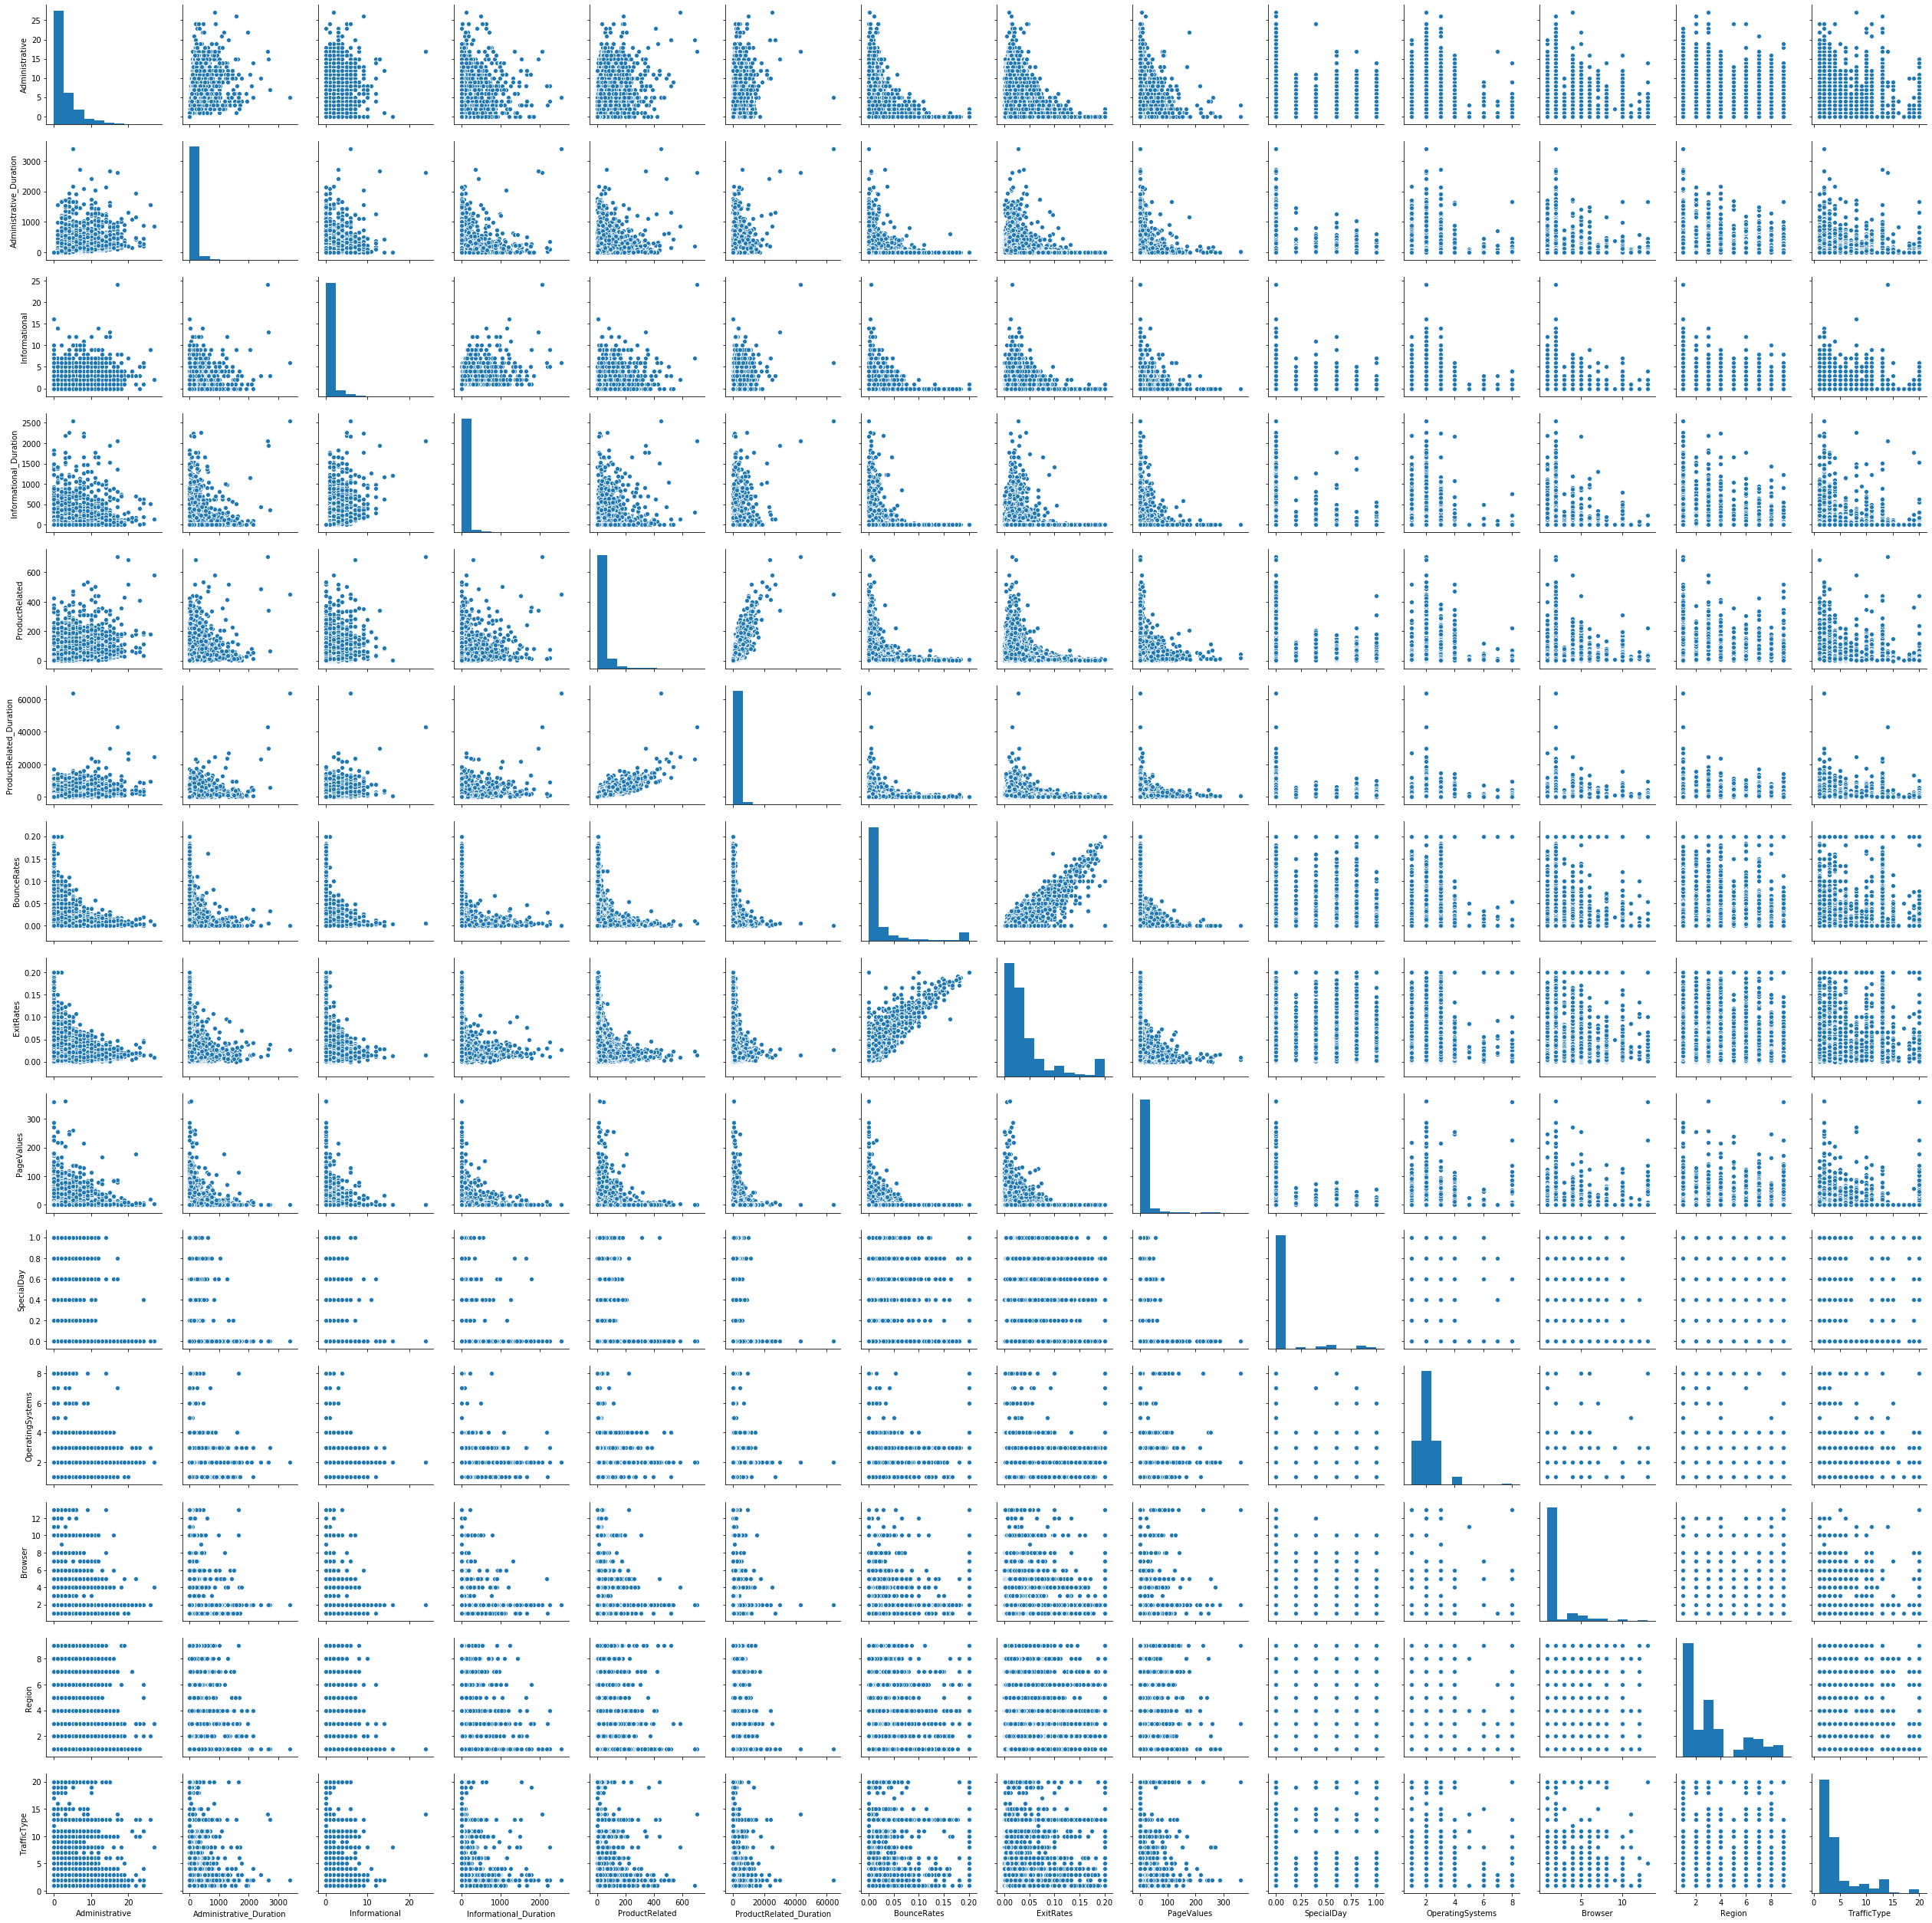

In [15]:
df_new = df.drop(['VisitorType','Weekend','Revenue'], axis=1)
sns.pairplot(df_new, palette='magma')

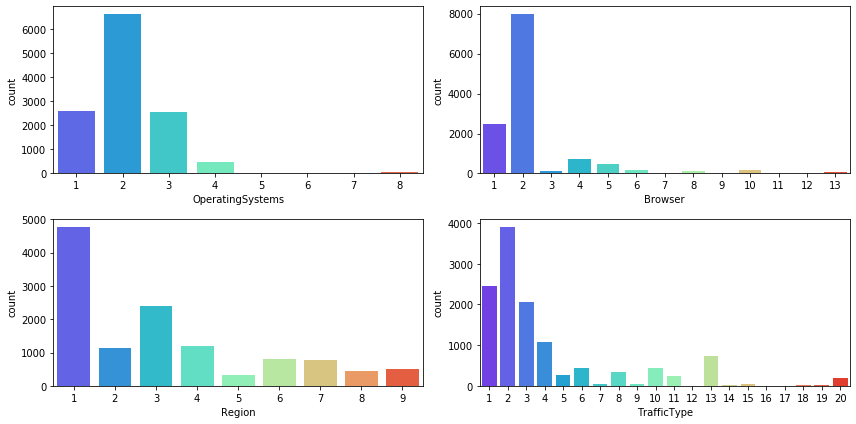

In [16]:
f, axes=plt.subplots(2,2,figsize=[12,6])
sns.countplot(x='OperatingSystems', data=df, ax=axes[0,0], palette='rainbow')
sns.countplot(x='Browser', data=df, ax=axes[0,1], palette='rainbow')
sns.countplot(x='Region', data=df, ax=axes[1,0], palette='rainbow')
sns.countplot(x='TrafficType', data=df, ax=axes[1,1], palette='rainbow')
plt.tight_layout()

Dari grafik di atas terlihat distribusi dari masing-masing <i>Operating systems, browser, region, traffic type</i> yang digunakan.

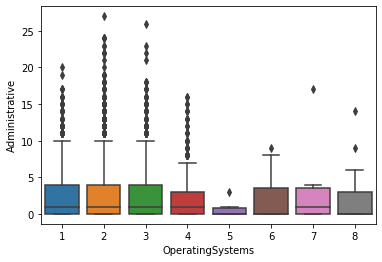

In [17]:
sns.boxplot(x='OperatingSystems', y='Administrative', data=df)

Grafik <i>box plot</i> di atas menunjukkan hubungan antara <i>operating systems vs administrative</i> terdapat nilai <i>outliers</i> sehingga atribut <i>administrative</i> tidak baik digunakan sebagai variabel prediktor.

In [18]:
df.groupby('OperatingSystems').count().head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
OperatingSystems,,,,,,,,,,,,,,,,,
1,2585,2585,2585,2585,2585,2585,2585,2585,2585,2585,2585,2585,2585,2585,2585,2585,2585
2,6601,6601,6601,6601,6601,6601,6601,6601,6601,6601,6601,6601,6601,6601,6601,6601,6601
3,2555,2555,2555,2555,2555,2555,2555,2555,2555,2555,2555,2555,2555,2555,2555,2555,2555
4,478,478,478,478,478,478,478,478,478,478,478,478,478,478,478,478,478
5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [19]:
df.groupby('Browser').count().head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Region,TrafficType,VisitorType,Weekend,Revenue
Browser,,,,,,,,,,,,,,,,,
1,2462,2462,2462,2462,2462,2462,2462,2462,2462,2462,2462,2462,2462,2462,2462,2462,2462
2,7961,7961,7961,7961,7961,7961,7961,7961,7961,7961,7961,7961,7961,7961,7961,7961,7961
3,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105
4,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736,736
5,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467


In [20]:
df.groupby('Region').count().head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,TrafficType,VisitorType,Weekend,Revenue
Region,,,,,,,,,,,,,,,,,
1,4780,4780,4780,4780,4780,4780,4780,4780,4780,4780,4780,4780,4780,4780,4780,4780,4780
2,1136,1136,1136,1136,1136,1136,1136,1136,1136,1136,1136,1136,1136,1136,1136,1136,1136
3,2403,2403,2403,2403,2403,2403,2403,2403,2403,2403,2403,2403,2403,2403,2403,2403,2403
4,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182
5,318,318,318,318,318,318,318,318,318,318,318,318,318,318,318,318,318


In [21]:
df.groupby('TrafficType').count().head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,VisitorType,Weekend,Revenue
TrafficType,,,,,,,,,,,,,,,,,
1,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451
2,3913,3913,3913,3913,3913,3913,3913,3913,3913,3913,3913,3913,3913,3913,3913,3913,3913
3,2052,2052,2052,2052,2052,2052,2052,2052,2052,2052,2052,2052,2052,2052,2052,2052,2052
4,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069,1069
5,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260


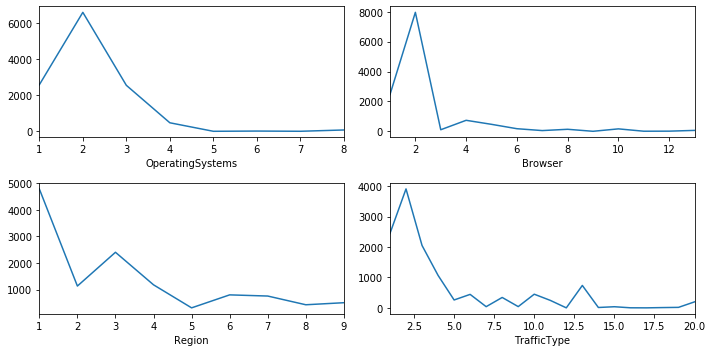

In [22]:
f, axes=plt.subplots(2,2, figsize=[10,5])
df.groupby('OperatingSystems').count()['Administrative'].plot(ax=axes[0,0])
df.groupby('Browser').count()['ProductRelated'].plot(ax=axes[0,1])
df.groupby('Region').count()['BounceRates'].plot(ax=axes[1,0])
df.groupby('TrafficType').count()['SpecialDay'].plot(ax=axes[1,1])
plt.tight_layout()

4 Grafik di atas menunjukkan jumlah asal pengguna dan penggunaan <i>operating systems, browser, traffic type</i> oleh pengunjung. Untuk <i>operating systems</i> banyak menggunakan jenis 2, untuk <i>browser</i> banyak menggunakan jenis 2, dan untuk <i>traffic type</i> banyak menggunakan jenis 2.5 . Kemudian untuk jumlah region terbanyak yang memiliki niat belanja online berada pada region 1.

Selanjutnya akan dilihat korelasi dari masing-masing atribut.

(16, 0)

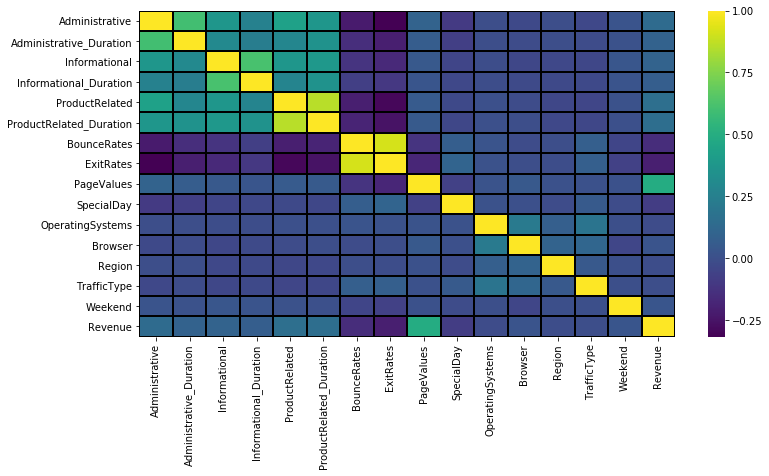

In [23]:
plt.figure(figsize=[12,6])
sns.heatmap(df.corr(), cmap='viridis', lw=1, linecolor='black')
plt.xlim(0,16)
plt.ylim(16,0)

Dari grafik hubungan korelasi di atas menunjukkan bahwa terdapat beberapa atribut yang memiliki korelasi positif dengan besar nilainya lebih dari 0.25.

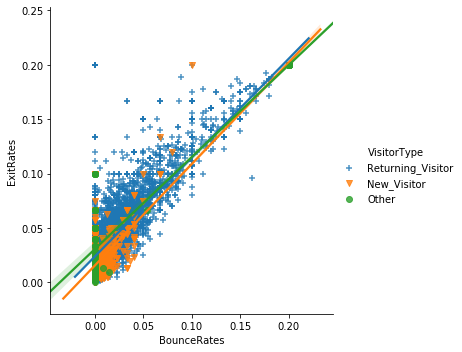

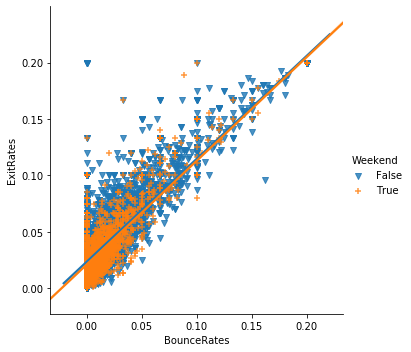

In [24]:
#f, (ax1, ax2)=plt.subplots(1,2,figsize=[12,6], sharex=True)
sns.lmplot(x='BounceRates', y='ExitRates', data=df, hue='VisitorType', markers=['+','v','o'])
sns.lmplot(x='BounceRates', y='ExitRates', data=df, hue='Weekend', markers=['v','+'])

Dari kedua grafik regresi di atas ditunjukkan bahwa:
<ul>
    <li style="text-align:justify">Pada grafik regresi pertama semakin banyak pembeli yang mengunjungi (<i>Bounce Rates</i>) maka semakin besar juga <i>Exit Rates</i> dan banyak didominasi oleh <i>returning visitor</i> dan <i>new visitor</i> yang jumlahnya juga semakin meningkat. Namun untuk jenis visitor <i>others</i> mengalami penurunan seiring meningkatnya <i>Bounce Rates</i> dan <i>Exit Rates</i>.</li>
    <li style="text-align:justify">Pada grafik regresi kedua semakin banyak pembeli yang mengunjungi (<i>Bounce Rates</i>) maka semakin besar juga <i>Exit Rates</i> dan pada terlihat juga pembeli yang berbelanja online pada akhir pekan lebih sedikit atau mengalami penurunan pada akhir pekan.
    </li>
<ul>

Selanjutnya akan dilihat pola pengunjung pada akhir pekan per bulan.

In [25]:
df.groupby(by=['Weekend','Month']).count().head(4)

Administrative  Administrative_Duration  Informational  \
Weekend Month                                                           
False   Aug               337                      337            337   
        Dec              1361                     1361           1361   
        Feb               156                      156            156   
        Jul               328                      328            328   

               Informational_Duration  ProductRelated  \
Weekend Month                                           
False   Aug                       337             337   
        Dec                      1361            1361   
        Feb                       156             156   
        Jul                       328             328   

               ProductRelated_Duration  BounceRates  ExitRates  PageValues  \
Weekend Month                                                                
False   Aug                        337          337        337         337   
        Dec                       1361         1361       1361        1361   
        Feb                        156          156        156         156   
        Jul                        328          328        328         328   

               SpecialDay  OperatingSystems  Browser  Region  TrafficType  \
Weekend Month                                                               
False   Aug           337               337      337     337          337   
        Dec          1361              1361     1361    1361         1361   
        Feb           156               156      156     156          156   
        Jul           328               328      328     328          328   

               VisitorType  Revenue  
Weekend Month                        
False   Aug            337      337  
        Dec           1361     1361  
        Feb            156      156  
        Jul            328      328

(0, 10)

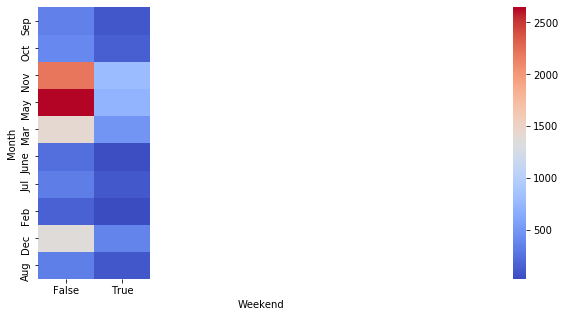

In [26]:
bymonth_weekend = df.groupby(by=['Month','Weekend']).count()['PageValues'].unstack()

plt.figure(figsize=[10,5])
sns.heatmap(bymonth_weekend, cmap='coolwarm', cbar_kws={"shrink": 1})
plt.xlim(0,8)
plt.ylim(0,10)

Dari grafik heatmap di atas terlihat bahwa banyak dari pembeli yang tidak mengunjungi situs web pada akhir pekan terutama yang terbesar pada bulan Mei. Kemudian diikuti pada bulan November, Maret, dan Desember. Kemudian mengingat juga pada bulan November dan Desember itu puncak dari musim liburan sehingga terlihat terjadi penurunan belanja online.

Selanjutnya akan dilihat pengaruh beberapa atribut yang berdasarkan pada <i>operating systems, region, browser,</i> dan <i>traffic type</i>.

In [27]:
df_ope_adm = df.pivot_table(index='Region', columns='OperatingSystems', values='Administrative_Duration')
df_bro_adm = df.pivot_table(index='Region', columns='Browser', values='Administrative_Duration')
df_tra_adm = df.pivot_table(index='Region', columns='TrafficType', values='Administrative_Duration')

In [28]:
df_ope_pag = df.pivot_table(index='Region', columns='OperatingSystems', values='PageValues')
df_bro_pag = df.pivot_table(index='Region', columns='Browser', values='PageValues')
df_tra_pag = df.pivot_table(index='Region', columns='TrafficType', values='PageValues')

In [29]:
df_ope_spe = df.pivot_table(index='Region', columns='OperatingSystems', values='SpecialDay')
df_bro_spe = df.pivot_table(index='Region', columns='Browser', values='SpecialDay')
df_tra_spe = df.pivot_table(index='Region', columns='TrafficType', values='SpecialDay')

In [30]:
df_ope_adm.isnull().sum().head()
df_bro_adm.isnull().sum().head()
df_tra_adm.isnull().sum().head()

df_ope_pag.isnull().sum().head()
df_bro_pag.isnull().sum().head()
df_tra_pag.isnull().sum().head()

df_ope_spe.isnull().sum().head()
df_bro_spe.isnull().sum().head()
df_tra_spe.isnull().sum().head()

TrafficType
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [31]:
for i in df_ope_adm.columns:
    a=df_ope_adm[df_ope_adm[i].isnull()].shape[0]
    if (a>0) and (df_ope_adm[i].dtypes in ['int','float']):
        df_ope_adm.fillna(df_ope_adm[df_ope_adm[i].notnull()].mean(), inplace=True)

for i in df_bro_adm.columns:
    a=df_bro_adm[df_bro_adm[i].isnull()].shape[0]
    if (a>0) and (df_bro_adm[i].dtypes in ['int','float']):
        df_bro_adm.fillna(df_bro_adm[df_bro_adm[i].notnull()].mean(), inplace=True)

for i in df_tra_adm.columns:
    a=df_tra_adm[df_tra_adm[i].isnull()].shape[0]
    if (a>0) and (df_tra_adm[i].dtypes in ['int','float']):
        df_tra_adm.fillna(df_tra_adm[df_tra_adm[i].notnull()].mean(), inplace=True)


for i in df_ope_pag.columns:
    a=df_ope_pag[df_ope_pag[i].isnull()].shape[0]
    if (a>0) and (df_ope_pag[i].dtypes in ['int','float']):
        df_ope_pag.fillna(df_ope_pag[df_ope_pag[i].notnull()].mean(), inplace=True)

for i in df_bro_pag.columns:
    a=df_bro_pag[df_bro_pag[i].isnull()].shape[0]
    if (a>0) and (df_bro_pag[i].dtypes in ['int','float']):
        df_bro_pag.fillna(df_bro_pag[df_bro_pag[i].notnull()].mean(), inplace=True)

for i in df_tra_pag.columns:
    a=df_tra_pag[df_tra_pag[i].isnull()].shape[0]
    if (a>0) and (df_tra_pag[i].dtypes in ['int','float']):
        df_tra_pag.fillna(df_tra_pag[df_tra_pag[i].notnull()].mean(), inplace=True)


for i in df_ope_spe.columns:
    a=df_ope_spe[df_ope_spe[i].isnull()].shape[0]
    if (a>0) and (df_ope_spe[i].dtypes in ['int','float']):
        df_ope_spe.fillna(df_ope_spe[df_ope_spe[i].notnull()].mean(), inplace=True)

for i in df_bro_spe.columns:
    a=df_bro_spe[df_bro_spe[i].isnull()].shape[0]
    if (a>0) and (df_bro_spe[i].dtypes in ['int','float']):
        df_bro_spe.fillna(df_bro_spe[df_bro_spe[i].notnull()].mean(), inplace=True)

for i in df_tra_spe.columns:
    a=df_tra_spe[df_tra_spe[i].isnull()].shape[0]
    if (a>0) and (df_tra_spe[i].dtypes in ['int','float']):
        df_tra_spe.fillna(df_tra_spe[df_tra_spe[i].notnull()].mean(), inplace=True)

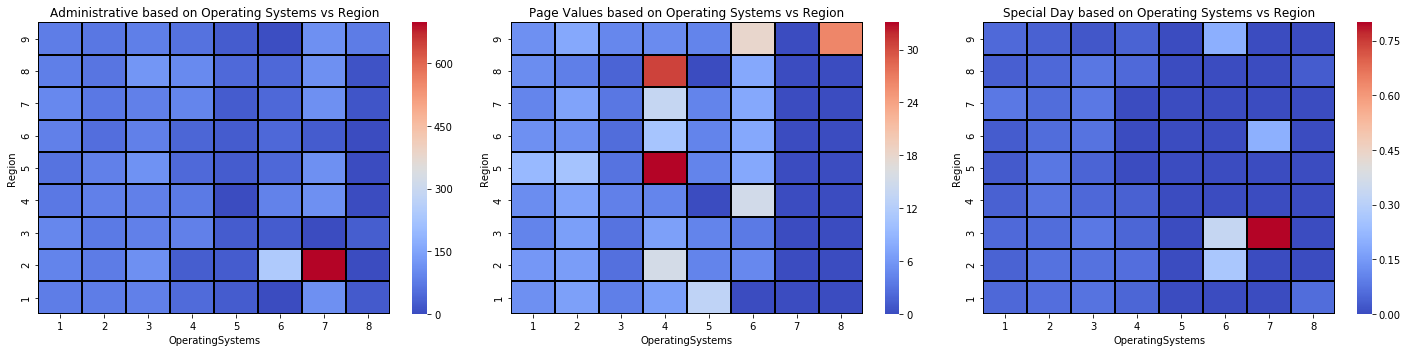

In [32]:
f, axes = plt.subplots(1,3,figsize=[20,5])
ope_adm = sns.heatmap(df_ope_adm, cmap='coolwarm', ax=axes[0], lw=1, linecolor='black')
ope_adm.set_xlim(0,8)
ope_adm.set_ylim(0,9)
ope_adm.set_title('Administrative based on Operating Systems vs Region')

ope_pag = sns.heatmap(df_ope_pag, cmap='coolwarm', ax=axes[1], lw=1, linecolor='black')
ope_pag.set_xlim(0,8)
ope_pag.set_ylim(0,9)
ope_pag.set_title('Page Values based on Operating Systems vs Region')

ope_spe = sns.heatmap(df_ope_spe, cmap='coolwarm', ax=axes[2], lw=1, linecolor='black')
ope_spe.set_xlim(0,8)
ope_spe.set_ylim(0,9)
ope_spe.set_title('Special Day based on Operating Systems vs Region')

plt.tight_layout()

Dari 3 grafik heatmap di atas ditunjukkan bahwa:
<ul>
    <li style="text-align:justify">Pada grafik heatmap sebelah kiri terlihat bahwa jumlah <i>administrative</i> paling banyak dari pembeli online menggunakan <i>operating systems</i> jenis 7 pada <i>region</i> 2. Tentu saja hal ini menunjukkan bahwa pada <i>region</i> 2 perlu dipertahankan dan lebih ditingkatkan lagi mengenai layanannya dan untuk <i>region</i> lainnya perlu dilakukan peningkatan layanan yang lebih agar dapat memperoleh hasil seperti pada <i>region</i> 2 bahkan harus lebih.</li>
    <li style="text-align:justify">Pada grafik heatmap tengah terlihat bahwa nilai rata-rata terbesar untuk halaman web yang diunjungi pembeli sebelum melakukan transaksi (<i>page values</i>) menggunakan <i>operating systems</i> jenis 4 berturut-turut pada <i>region</i> 5 dan 8. </li>
    <li style="text-align:justify">Pada grafik heatmap sebelah kanan terlihat bahwa jumlah transaksi yang diselesaikan pada <i>special day</i> lebih banyak menggunakan <i>operating systems</i> jenis 7 pada <i>region</i> 3.</li>
<ul>

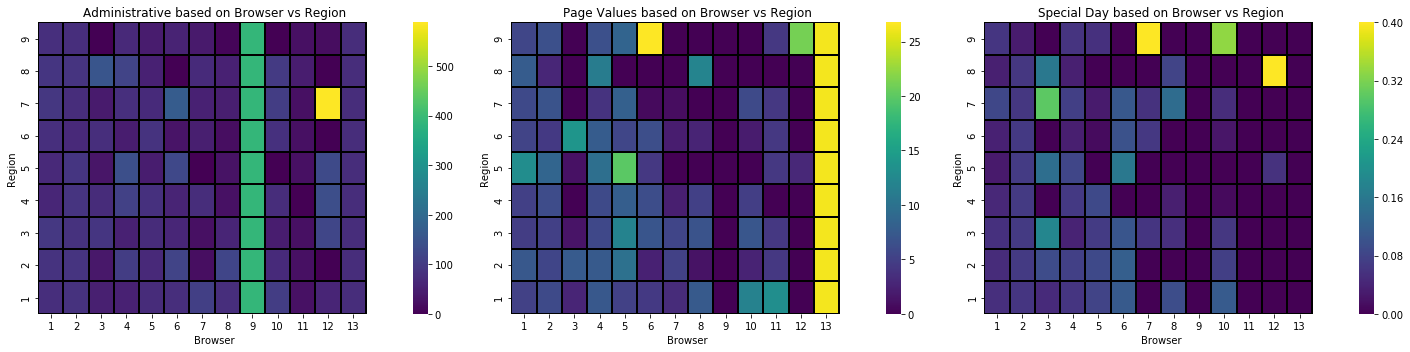

In [33]:
f, axes = plt.subplots(1,3,figsize=[20,5])
bro_adm = sns.heatmap(df_bro_adm, cmap='viridis', ax=axes[0], lw=1, linecolor='black')
bro_adm.set_xlim(0,14)
bro_adm.set_ylim(0,9)
bro_adm.set_title('Administrative based on Browser vs Region')

bro_pag = sns.heatmap(df_bro_pag, cmap='viridis', ax=axes[1], lw=1, linecolor='black')
bro_pag.set_xlim(0,14)
bro_pag.set_ylim(0,9)
bro_pag.set_title('Page Values based on Browser vs Region')

bro_spe = sns.heatmap(df_bro_spe, cmap='viridis', ax=axes[2], lw=1, linecolor='black')
bro_spe.set_xlim(0,14)
bro_spe.set_ylim(0,9)
bro_spe.set_title('Special Day based on Browser vs Region')

plt.tight_layout()

Dari 3 grafik heatmap di atas ditunjukkan bahwa:
<ul>
    <li style="text-align:justify">Pada grafik heatmap sebelah kiri terlihat bahwa jumlah <i>administrative</i> paling banyak dari pembeli online menggunakan <i>browser</i> jenis 12 pada <i>region</i> 7.
    <li style="text-align:justify">Pada grafik heatmap tengah terlihat bahwa nilai rata-rata terbesar untuk halaman web yang diunjungi pembeli sebelum melakukan transaksi (<i>page values</i>) menggunakan <i>browser</i> jenis 6 pada <i>region</i> 9 dan <i>browser</i> jenis 13 pada <i>region</i> 1-9. </li>
    <li style="text-align:justify">Pada grafik heatmap sebelah kanan terlihat bahwa jumlah transaksi yang diselesaikan pada <i>special day</i> lebih banyak menggunakan <i>browser</i> jenis 7 pada <i>region</i> 9 dan <i>browser</i> jenis 12 pada <i>region</i> 8.</li>
<ul>

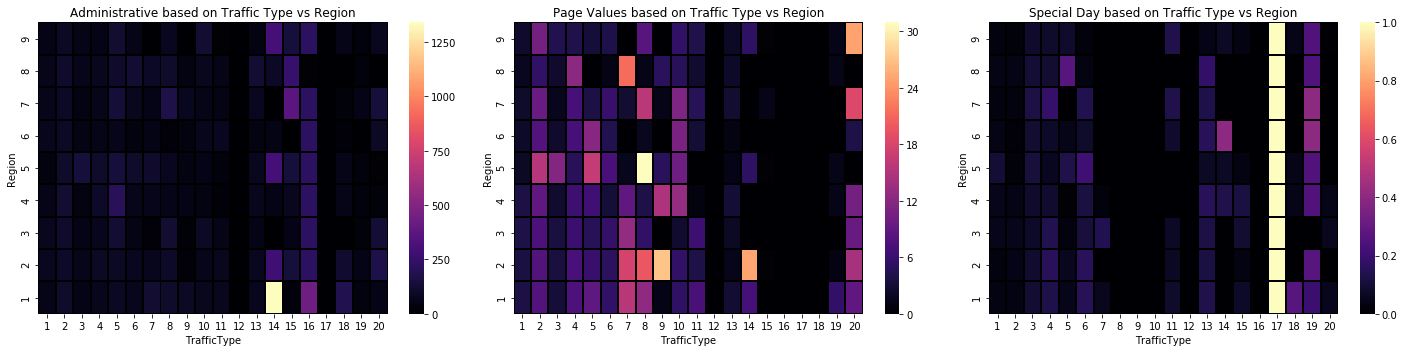

In [34]:
f, axes = plt.subplots(1,3,figsize=[20,5])
tra_adm = sns.heatmap(df_tra_adm, cmap='magma', ax=axes[0], lw=1, linecolor='black')
tra_adm.set_xlim(0,20)
tra_adm.set_ylim(0,9)
tra_adm.set_title('Administrative based on Traffic Type vs Region')

tra_pag = sns.heatmap(df_tra_pag, cmap='magma', ax=axes[1], lw=1, linecolor='black')
tra_pag.set_xlim(0,20)
tra_pag.set_ylim(0,9)
tra_pag.set_title('Page Values based on Traffic Type vs Region')

tra_spe = sns.heatmap(df_tra_spe, cmap='magma', ax=axes[2], lw=1, linecolor='black')
tra_spe.set_xlim(0,20)
tra_spe.set_ylim(0,9)
tra_spe.set_title('Special Day based on Traffic Type vs Region')

plt.tight_layout()

Dari 3 grafik heatmap di atas ditunjukkan bahwa:
<ul>
    <li style="text-align:justify">Pada grafik heatmap sebelah kiri terlihat bahwa jumlah <i>administrative</i> paling banyak dari pembeli online menggunakan <i>traffic type</i> jenis 14 pada <i>region</i> 1.
    <li style="text-align:justify">Pada grafik heatmap tengah terlihat bahwa nilai rata-rata terbesar untuk halaman web yang diunjungi pembeli sebelum melakukan transaksi (<i>page values</i>) menggunakan <i>traffic type</i> jenis 8 pada <i>region</i> 5.</li>
    <li style="text-align:justify">Pada grafik heatmap sebelah kanan terlihat bahwa jumlah transaksi yang diselesaikan pada <i>special day</i> lebih banyak menggunakan <i>traffic type</i> jenis 17 pada <i>region</i> 1-9.</li>
<ul>

___